*Notebook created by Enric Millán Iglesias for the Bachelor's Thesis (TFG) at BSC (2025).*

**Note:** Upload the ```evaluation_W012_extra_training_years_study.csv``` file before running

# Evaluation of varying training data for Region 12 (2005)

Training and evaluation were conducted on Region 12, using a fixed test year (2005) and incrementally increasing the number of years available for training. The goal of this analysis is to assess how different recurrent architectures (Vanilla RNN, LSTM, and GRU) respond to increased training data availability.

One year is always reserved for validation, meaning that with n total years selected, (n - 1) are effectively used for training. The experiment starts with the most recent years (2013–2014), providing 1 year of training, and progressively expands backward one year at a time, up to 2006–2014, resulting in 8 training years.

## Loading experiment logs

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the CSV file
df = pd.read_csv('evaluation_W012_extra_training_years_study.csv')

# Display the shape and first few rows
print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Loaded 72 rows and 58 columns


,timestamp,model_name,model_path,region,start_year,end_year,train_years,test_years,model_type,cell_type,...,r2_clipped,mse_corrected,rmse_corrected,mae_corrected,r2_corrected,bias_correction,train_losses,val_losses,num_model_parameters,training_curve_path
0,20250521_090552,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W012,2005,2014,2013-2014,2005,rnn,lstm,...,0.94472,0.22477,0.47410,0.31853,0.94262,0.05514,"2.75281,0.45670,0.39700,0.37629,0.36405,0.3545...","0.39794,0.32541,0.32081,0.32934,0.32464,0.3346...",16545,/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
1,20250521_090552,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W012,2005,2014,2013-2014,2005,rnn,rnn,...,0.94135,0.28139,0.53047,0.38723,0.92884,0.13206,"1.13186,0.26008,0.24345,0.23139,0.22505,0.2209...","0.34844,0.33859,0.33117,0.33655,0.34635,0.3377...",14465,/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
2,20250521_090640,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W012,2005,2014,2013-2014,2005,rnn,lstm,...,0.94394,0.24220,0.49214,0.33789,0.93823,0.08862,"2.36836,0.46099,0.39797,0.36901,0.35158,0.3409...","0.41166,0.33110,0.31238,0.31422,0.33022,0.3272...",16545,/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
3,20250521_090640,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W012,2005,2014,2013-2014,2005,rnn,rnn,...,0.94219,0.24585,0.49583,0.33980,0.93679,0.08504,"1.24210,0.25635,0.24150,0.23388,0.22880,0.2249...","0.35893,0.35577,0.32753,0.33039,0.34250,0.3625...",14465,/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
4,20250521_090602,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W012,2005,2014,2013-2014,2005,rnn,gru,...,0.94327,0.23684,0.48666,0.32913,0.93979,0.07077,"1.43923,0.30342,0.24252,0.22969,0.22245,0.2171...","0.45367,0.33019,0.32620,0.32943,0.33236,0.3405...",43265,/gpfs/scratch/bsc32/ai4land/saved_data/trainin...


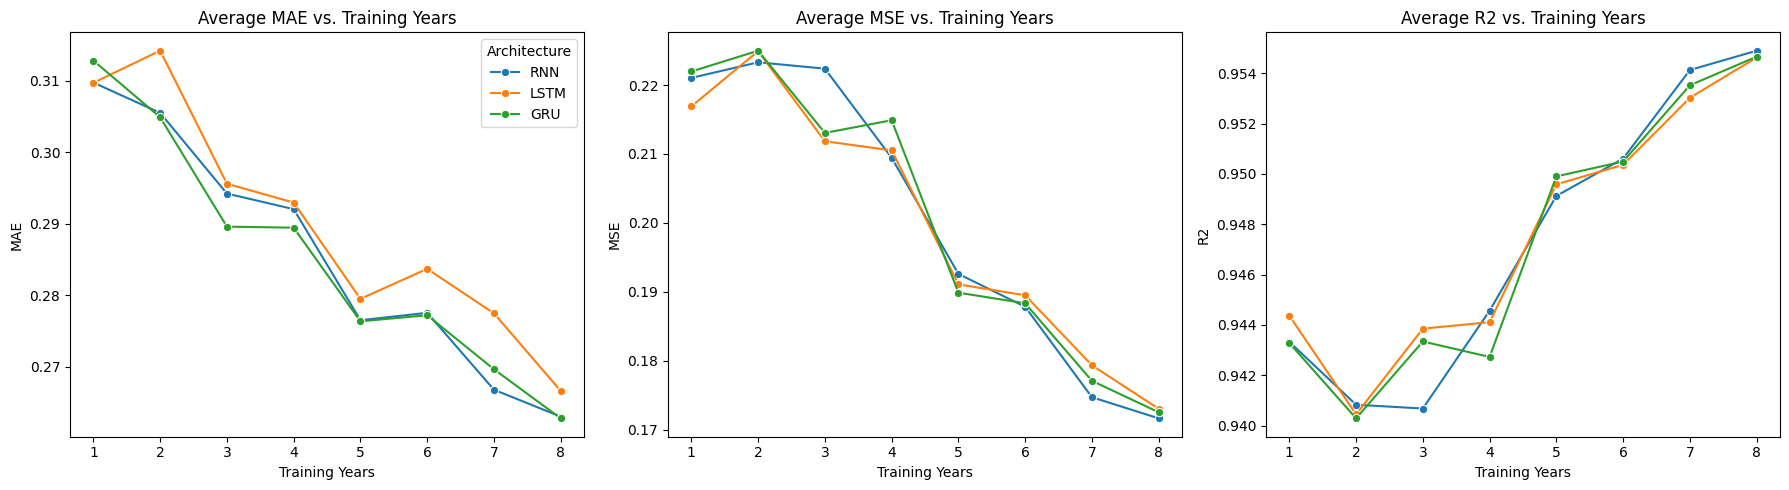

In [2]:
# Define metrics and architectures
metrics = ['mae', 'mse', 'r2']
architectures = ['rnn', 'lstm', 'gru']

# Create subplots: one row, three columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Loop through each metric and subplot
for i, metric in enumerate(metrics):
    ax = axes[i]

    for arch in architectures:
        df_arch = df[df['cell_type'] == arch].copy()
        avg_by_years = df_arch.groupby('num_train_years')[metric].mean().reset_index()
        sns.lineplot(data=avg_by_years, x='num_train_years', y=metric, label=arch.upper(), marker='o', ax=ax)

    ax.set_title(f"Average {metric.upper()} vs. Training Years")
    ax.set_xlabel("Training Years")
    ax.set_ylabel(metric.upper())
    ax.legend(title="Architecture")

    # Keep only one legend
    if i != 0:
      ax.legend().remove()

plt.tight_layout()
plt.show()



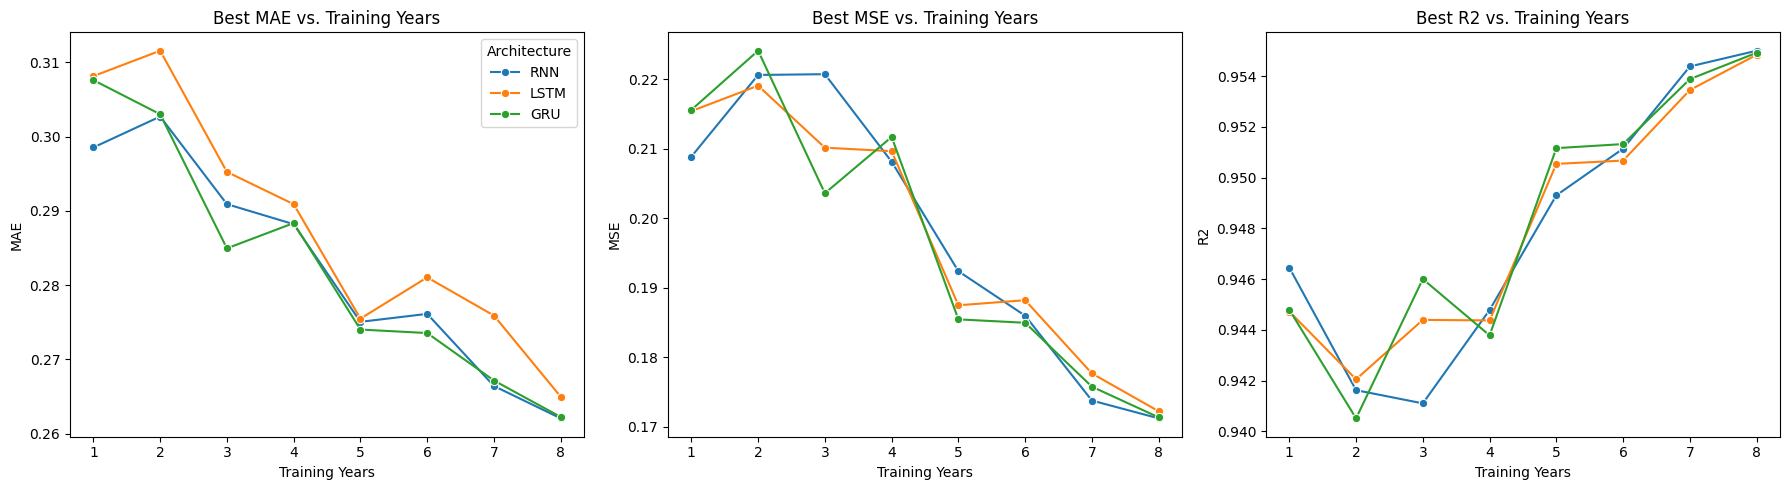

In [3]:
# Create subplots: one row, three columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Loop through each metric and subplot
for i, metric in enumerate(metrics):
    ax = axes[i]

    for arch in architectures:
        df_arch = df[df['cell_type'] == arch].copy()

        # Select best run per group
        if metric == 'r2':
            best_per_year = df_arch.loc[df_arch.groupby('num_train_years')[metric].idxmax()]
        else:
            best_per_year = df_arch.loc[df_arch.groupby('num_train_years')[metric].idxmin()]

        sns.lineplot(data=best_per_year, x='num_train_years', y=metric, label=arch.upper(), marker='o', ax=ax)

    ax.set_title(f"Best {metric.upper()} vs. Training Years")
    ax.set_xlabel("Training Years")
    ax.set_ylabel(metric.upper())

    # Show legend only on first plot
    if i == 0:
        ax.legend(title="Architecture")
    else:
        ax.legend().remove()

plt.tight_layout()
plt.show()
